<a href="https://colab.research.google.com/github/MhammadRezaValiYari/loan-validation/blob/main/Loan_validation_with_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import essensional library

In [62]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [40]:
drive.mount('/content/drive', force_remount=True)
!ls '/content/drive/MyDrive/loan_data_set.csv'
data = pd.read_csv('/content/drive/MyDrive/loan_data_set.csv')
df = pd.DataFrame(data)
df.head(4)

Mounted at /content/drive
/content/drive/MyDrive/loan_data_set.csv


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


# Data Cleaning

In [41]:
df = df.drop(['Loan_ID'], axis='columns')

In [42]:
def replace(df, col, rep1, rep2):
  df[col] = df[col].replace(rep1, rep2)
  return df

In [43]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [44]:
replace(df = df, col = 'Gender', rep1 = 'Male', rep2 = 0)
replace(df = df, col = 'Gender', rep1 = 'Female', rep2 = 1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,0.0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0.0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0.0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,0.0,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,0.0,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,0.0,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [45]:
replace(df = df, col = 'Married', rep1 = 'No', rep2 = 0)
replace(df = df, col = 'Married', rep1 = 'Yes', rep2 = 1)
replace(df = df, col = 'Self_Employed', rep1 = 'No', rep2 = 0)
replace(df = df, col = 'Self_Employed', rep1 = 'Yes', rep2 = 1)
replace(df = df, col = 'Loan_Status', rep1 = 'N', rep2 = -1)
replace(df = df, col = 'Loan_Status', rep1 = 'Y', rep2 = 1)
replace(df = df, col = 'Property_Area', rep1 = 'Urban', rep2 = 0)
replace(df = df, col = 'Property_Area', rep1 = 'Rural', rep2 = 1)
replace(df = df, col = 'Education', rep1 = 'Not Graduate', rep2 = 0)
replace(df = df, col = 'Education', rep1 = 'Graduate', rep2 = 1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,1,-1
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,1,1
610,0.0,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,1,1
611,0.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,0,1
612,0.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,0,1


In [55]:
df.drop(df[(df['Property_Area'] == 'Semiurban')].index, inplace=True)

In [56]:
df['Dependents'].unique()

array(['0', '1', '2', 3], dtype=object)

In [57]:
replace(df = df, col = 'Dependents', rep1 = '3+', rep2 = 3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,128.0,360.0,1.0,0,1
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,1,-1
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,0.0,1.0,0,1,0.0,3232,1950.0,108.0,360.0,1.0,1,1
609,1.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,1,1
610,0.0,1.0,3,1,0.0,4106,0.0,40.0,180.0,1.0,1,1
611,0.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,0,1


In [58]:
df.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [59]:
df.fillna(method='bfill', inplace=True)

In [60]:
df.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


#Correlation matrix



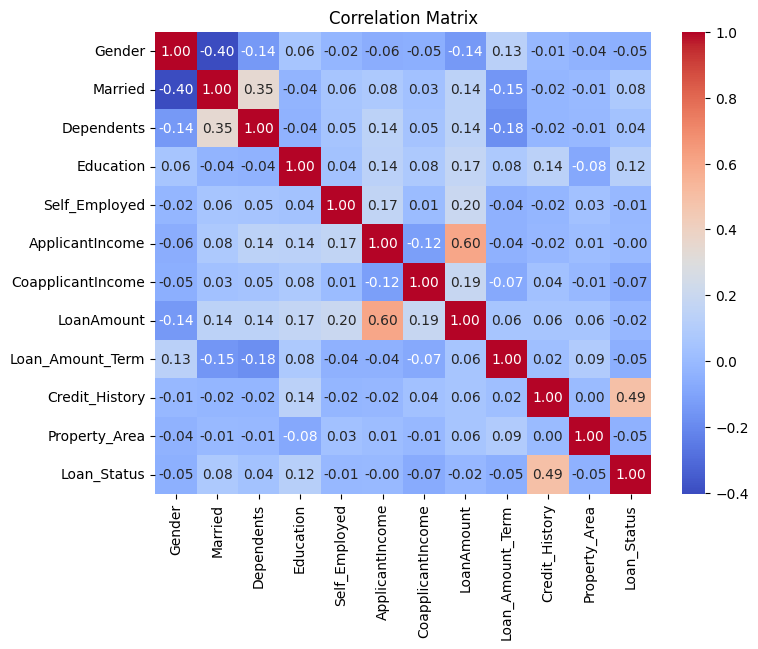

In [64]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()